#  **Estudio Hospitalizacion - Modelo de Machine Learning** 

## Modelo de Predicción de Hospitalización por Complicaciones Infecciosas Después de Biopsia Prostática

## *Objetivo del Proyecto:*

El objetivo del proyecto es identificar las características más relevantes de los pacientes que, tras someterse a una biopsia prostática, desarrollan complicaciones infecciosas que necesitan hospitalización en comparación con aquellos que no experimentan dichas complicaciones y, por lo tanto, no requieren hospitalización.

Para ello, se definió como "casos de hospitalización" a los pacientes que, después de someterse a una biopsia prostática, presentan fiebre, infección urinaria o sepsis en un plazo máximo de 30 días tras el procedimiento, lo que requiere atención médica ambulatoria u hospitalización para resolver la complicación. Por otro lado, se considera "control" a los pacientes que se sometieron a una biopsia prostática y no desarrollaron complicaciones infecciosas en el período de 30 días posterior al procedimiento.

Para ello, el departamento de datos ha recopilado Antecedentes del paciente, Morbilidad asociada al paciente y Antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas. Estos datos se encuentran en el archivo BBDD_Hospitalizacion.xlsx. El diccionario detallado de los datos se puede encontrar en el README.md del presente proyecto.

Lo que se busca es saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización y crear un modelo predictivo de clasificación para la variable objetivo: **HOSPITALIZACION**.

## *Solución:*

### *2. Modelo de Machine Learning:* 

#### *2.1. Carga de base a datos limpia:*

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

db = pd.read_csv('DSLimpioHospitalizacion.csv')
db

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,HOSPITALIZACION
0,53.0,0,4.0,1,12.0,1
1,56.0,0,7.7,1,12.0,1
2,57.0,0,29.0,1,24.0,1
3,56.0,0,7.0,1,12.0,1
4,55.0,0,29.0,1,24.0,1
...,...,...,...,...,...,...
426,55.0,0,5.0,0,12.0,0
427,70.0,1,18.0,1,12.0,0
428,75.0,0,75.0,1,12.0,0
429,67.0,0,6.0,1,12.0,0


#### *2.2. Balanceo de clases:*

En el análisis exploratorio de los datos (EDA), vimos que habían en total 433 datos, de los cuales 23 eran para la clase 1 de HOSPITALIZACION y 410 para la clase 0 de HOSPITALIZACION. Vemos que hay un desbalanceo muy grande de clases, por lo que al entrenar un modelo de Machine Learning con este desbalanceo, va a hacer que sea muy bueno para clasificar un registro en la clase 0 pero my malo para clasificar un registro en la clase 1. Por esta razón, vamos a tomar aleatoriamente 30 registros de la clase 0 y los 23 registros de la clase 1. De esta forma, el dataset queda más balanceado.

In [58]:
#Creamos máscara para tomar solo los registros que no presentaron hospitalización
mascaraNo = (db['HOSPITALIZACION'] == 0)
dbNo = db[mascaraNo]

# Seleccionar aleatoriamente 30 filas del DataFrame en los que la variable HOSPITALIZACION es 0.
muestraAleatoriaNo = dbNo.sample(n=30, random_state=42)

# Mostrar las filas seleccionadas
muestraAleatoriaNo

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,HOSPITALIZACION
93,61.0,0,12.00,1,12.0,0
241,80.0,0,76.00,1,10.0,0
281,48.0,1,3.60,1,12.0,0
56,52.0,0,6.00,0,24.0,0
65,54.0,0,8.70,1,24.0,0
100,62.0,0,8.30,1,12.0,0
160,71.0,0,5.00,1,12.0,0
357,61.0,1,5.70,1,12.0,0
268,59.0,0,6.00,0,12.0,0
289,64.0,0,8.00,1,12.0,0


Ahora sacamos los 23 resgistros con Hospitalización:

In [59]:
mascaraSi = (db['HOSPITALIZACION'] == 1)
dbSi = db[mascaraSi]
dbSi

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,HOSPITALIZACION
0,53.0,0,4.00,1,12.0,1
1,56.0,0,7.70,1,12.0,1
2,57.0,0,29.00,1,24.0,1
3,56.0,0,7.00,1,12.0,1
4,55.0,0,29.00,1,24.0,1
5,55.0,1,4.00,1,12.0,1
6,53.0,0,7.00,1,12.0,1
7,67.0,0,6.20,1,12.0,1
8,69.0,0,6.00,0,12.0,1
9,54.0,0,7.70,1,12.0,1


Juntamos ambos dataframes:

In [60]:
# Combinar las filas de df1 y df2 en un nuevo DataFrame usando concat
dfBalanceado = pd.concat([muestraAleatoriaNo, dbSi], ignore_index=True)
dfBalanceado

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,HOSPITALIZACION
0,61.0,0,12.00,1,12.0,0
1,80.0,0,76.00,1,10.0,0
2,48.0,1,3.60,1,12.0,0
3,52.0,0,6.00,0,24.0,0
4,54.0,0,8.70,1,24.0,0
5,62.0,0,8.30,1,12.0,0
6,71.0,0,5.00,1,12.0,0
7,61.0,1,5.70,1,12.0,0
8,59.0,0,6.00,0,12.0,0
9,64.0,0,8.00,1,12.0,0


#### *2.2. Separación en X y Y:*

Separamos el dataset en X, y (variable objetivo)

In [61]:
X = dfBalanceado[['EDAD','DIABETES','PSA','VOLUMEN PROSTATICO','# MUESTRAS']]
y = dfBalanceado['HOSPITALIZACION']

[Text(0.5, 1.0, 'Variable Objetivo Balanceada')]

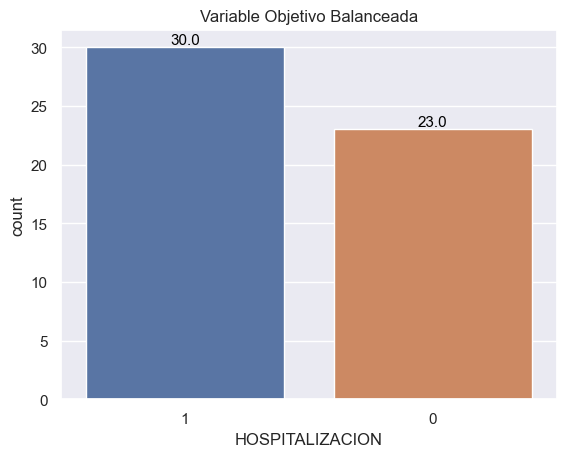

In [62]:
#Para que la gráfica sea coherente con lo que tenemos en el EDA, vamos a crear una variable temporal llamada dfBalanceadoOrd
#dfBalanceadoOrd['HOSPITALIZACION'] = 1 - dfBalanceado['HOSPITALIZACION']

# Creamos un countplot para HOSPITALIZACION
ax = sns.countplot(x='HOSPITALIZACION', data=dfBalanceado)

# Agregar el número del contador en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticklabels(['1', '0'])

ax.set(title = 'Variable Objetivo Balanceada')

#### *2.3. Separación en conjunto de Entrenamiento y Testeo:*

Separamos el dataset en X_train, X_test, y_train y y_test. Asignando una relación de 80% para el conjunto de entrenamiento y 20% para el conjunto de testeo. Usamos el parámetro "random_state=0" para que siempre que corramos este código, nos divida los conjuntos de la misma manera. El parámetro "stratify=y" permite que las clases 0 y 1 de la variable objetivo **HOSPITALIZACION** esté balanceada en ambos conjuntos.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

Vemos las dimensiones de X_train:

In [64]:
np.shape(X_train)

(42, 5)

Vemos las dimensiones de y_train:

In [65]:
np.shape(y_train)

(42,)

Vemos la proporción de las clases para la variable objetivo tanto en el set de train como en el set de test:

In [66]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 0.42857142857142855
Proporción de etiquetas en set de testeo: 0.45454545454545453


Esto quiere decir que un 42-45% de las clases en los conjuntos de train y test, son registros con hospitalización.

#### *2.4. Modelo de árboles de decisión:*

a. Instanciamos, entrenamos y predecimos sobre un árbol de decisión asignando una profundidad máxima arbitraria.

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instanciamos el árbol

tree = DecisionTreeClassifier(max_depth = None)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = tree.predict(X_test)

# Obtenemos la exactitud en cada uno de los conjuntos

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9761904761904762
Accuracy sobre conjunto de Test: 0.7272727272727273


Como al instanciar el modelo, habíamos establecido una profundidad sin límite, comprobamos a cuántos niveles llegó para que todas las hojas sean puras.

In [69]:
print('La cantidad de nodos del modelo clasificador es:' ,tree.tree_.max_depth)

La cantidad de nodos del modelo clasificador es: 8


b. Buscamos la profundidad óptima del arbol considerando que la profundidad máxima es 8.

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    tree2 = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(tree2, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


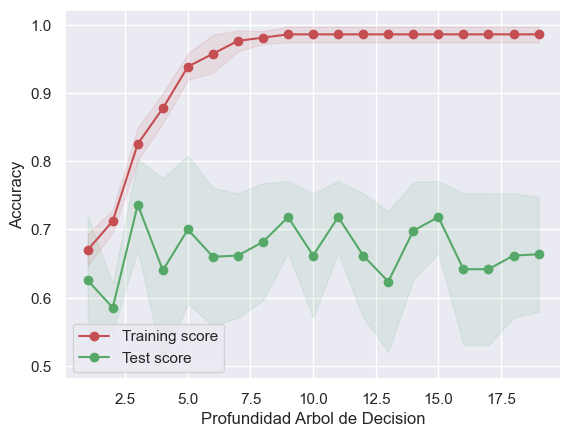

In [71]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

Vemos que la profundidad que nos ofrece una mayor exactitud en el conjunto de test sin entrar en un sobreajuste en el conjunto de entrenamiento, es de 3. Vamos a correr un nuevo árbol con esta profundidad.

c. Instanciamos un nuevo árbol con profundiad de 3 nodos (Es lo que se ve en la gráfica de optimización):

In [72]:
tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = tree1.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = tree1.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.8333333333333334
Accuracy sobre conjunto de Test: 0.7272727272727273


d. Visualización del árbol de decisión:

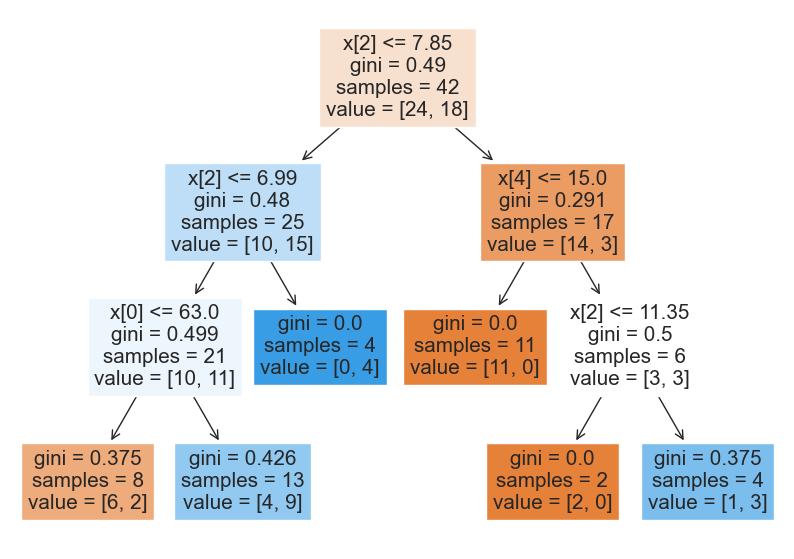

In [74]:
from sklearn import tree

plt.figure(figsize = (10,7))
tree.plot_tree(tree1, filled = True)
plt.show()

En el arbol de decisión vemos que inicia clasificando con la variable X[2], es decir, PSA. Si esta variable es menor o igual a 7.85, entonces 24 de los 42 registros no son hospitalizados y 18 si. Después baja al segundo nivel del árbol a revisar si la variable X[2][PSA] es menor o igual a 6.99 y por el otro lado, si a variable X[4], es decir, # de muestras es menor a 15. Y así sucesivamente hace clasificaciones. En general vemos que las variables con las que toma decisiones son X[2][PSA], X[4][# MUESTRAS] y X[0][EDAD]. Más adelante conoceremos los pesos de cada una de estas variables.

#### *2.5. Evaluación del modelo de árboles de decisión:*

a. Obtenemos la matrices de confusión:

In [75]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

In [76]:
#Graficamos las matrices de confusión

from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

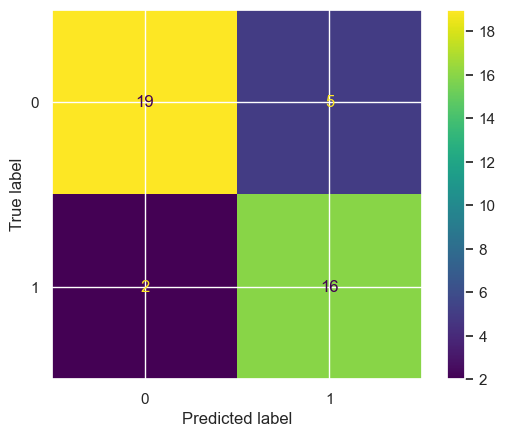

In [77]:
# Matriz para conjunto de entrenamiento
cm_display.plot()

Se puede observar que para el conjunto de entrenamiento (42 registros) lo siguiente:
- Cantidad de verdaderos negativos: 19
- Cantidad de verdaderos positivos: 16
- Cantidad de falsos negativos: 2
- Cantidad de falsos positivos: 5

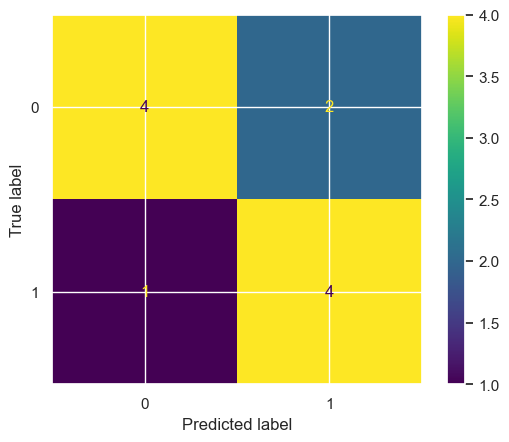

In [78]:
# Matriz para conjunto de test
cm_display_2.plot()

Se puede observar que para el conjunto de test (11 registros) lo siguiente:
- Cantidad de verdaderos negativos: 5
- Cantidad de verdaderos positivos: 4
- Cantidad de falsos negativos: 1
- Cantidad de falsos positivos: 2

b. **Exactitud:**

In [79]:
#Exactitud

from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.7272727272727273


La exactitud del modelo de test es de 72.7%, lo cual es una buena medida de ajuste e indica que el modelo tiene buena capacidad de predicción.

c. **Sensibilidad:**

In [80]:
#Sensibilidad
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_test_pred, average= None)
print(sensibilidad)

[0.66666667 0.8       ]


La sensibilidad es una medida que me indica cuantos verdaderos positivos (hospitalizados) tengo entre los verdaderos positivos y los falsos negativos (en realidad si van a estar hospitalizados pero el modelo arrojó que no). Esta métrica es del 80%. Lo cual es muy bueno porque queremos que haya la menor cantidad de falsos negativos y poder predecir adecuadamente los pacientes que van para hospitalización.

d. **Curva AUC-ROC:**

Con esta métrica medimos la capacidad de clasificación del modelo entre la clase 0 y 1 de la variable objetivo **HOSPITALIZACION**.

In [81]:
from sklearn.preprocessing import label_binarize

# Binarizamos y_test

y_test = label_binarize(y_test, classes=[0, 1])
y_test = np.hstack((y_test, 1 - y_test))
n_classes = y_test.shape[1]
print(y_test[:5])

[[1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]


In [82]:
y_score = tree1.predict_proba(X_test)
print(y_score[:5])

[[0.75       0.25      ]
 [0.30769231 0.69230769]
 [0.30769231 0.69230769]
 [0.         1.        ]
 [1.         0.        ]]


In [83]:
# Computamos los valores de FPR (Tasa de falsos positivos) y TPR (tasa de verdaderos positivos), para luego realizar
# el gráfico de la curva ROC.

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    fpr[i] = 1-fpr[i]
    tpr[i] = 1-tpr[i]
    roc_auc[i] = auc(fpr[i], tpr[i])

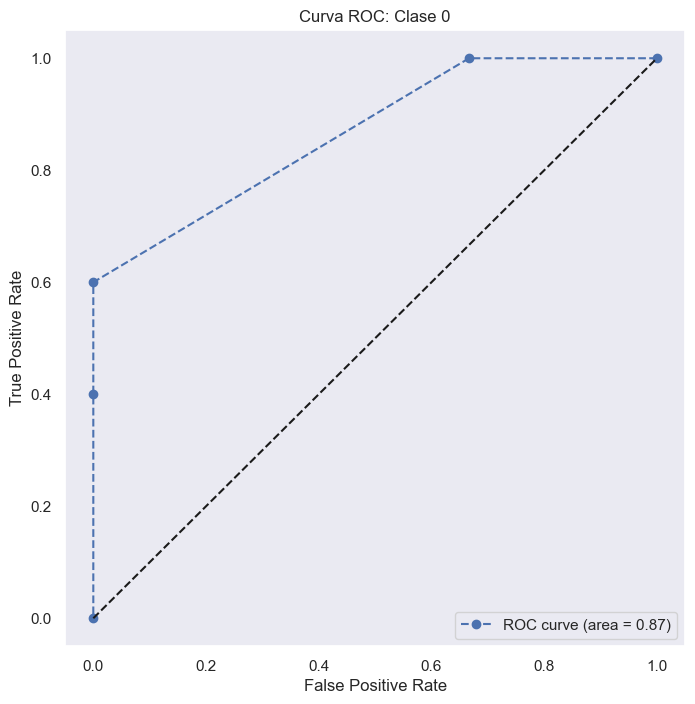

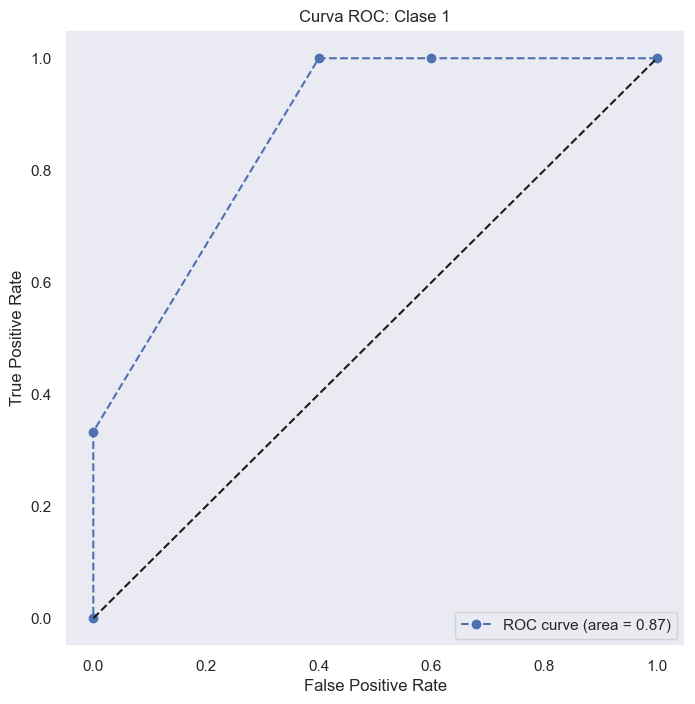

In [84]:
#Graficamos

# Recorremos con un bucle cada una de las clases

for i in range(n_classes):
    plt.figure(figsize=(8,8))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [85]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(y_test, y_pred, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [86]:
print('El AUC-ROC multiclase:',multiclass_roc_auc_score(y_test, y_test_pred))

El AUC-ROC multiclase: 0.7333333333333334


Vemos que la métrica AUC-ROC es de 0.73, lo cual indica que el modelo tiene un buen rendimiento a la hora de clasificar entre las clases 0 y 1 de la variable **HOSPITALIZACION**

e. Importancia de cada variable respecto a la clasificación de la variable objetivo:

In [87]:
tree1.feature_importances_

array([0.18396801, 0.        , 0.63173668, 0.        , 0.18429531])

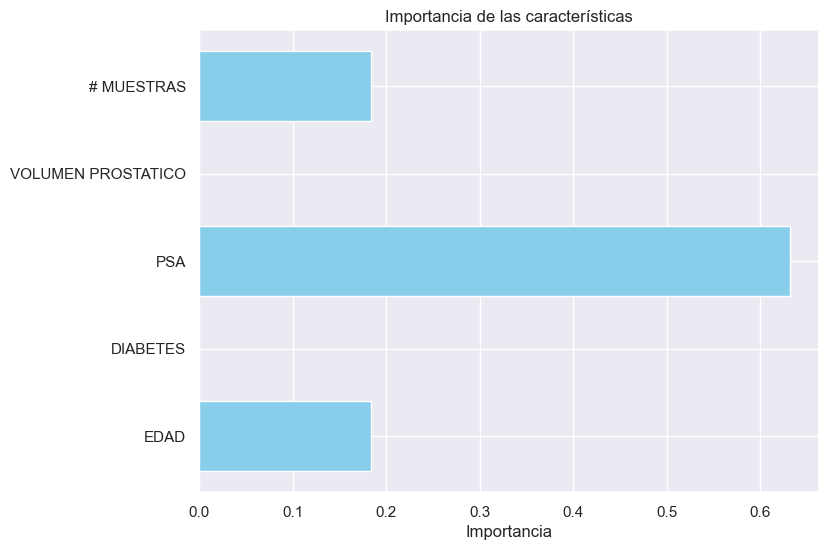

In [88]:
#Creamos gráfico de barras para mostrar importancia 

horizontal = ['EDAD', 'DIABETES', 'PSA','VOLUMEN PROSTATICO','# MUESTRAS']
vertical = tree1.feature_importances_

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.barh(horizontal, vertical, color='skyblue')  # Barra horizontal

# Etiquetas de los ejes y título
plt.xlabel('Importancia')
plt.title('Importancia de las características')

# Mostrar el gráfico
plt.show()

Del anterior gráfico se puede observar que la variable que tiene un mayor peso para definir si un paciente puede ser hospitalizado o no después de realizarse una Biopsia, es la variable PSA (Concentración del PSA en la sangre), con un 63.2%. Le sigue el número de muestras tomadas con un 18.4% y por último la edad del paciente con un 18.4%. 

#### *2.6. Modelo de K-Vecinos:*

Vamos a desarrollar otro modelo de Machine Learning para verificar si nos da un mejor performance. 

a. Normalización de las variables:

El modelo de K-Vecinos en un modelo de distancias y por lo tanto, debemos normalizar todas las variables para que se tenga un ambiente balanceado.

In [89]:
# Vamos a normalizar las variables EDAD, PSA, # MUESTRAS y DIAS PARA INFECCION mediante MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que deseas normalizar
columns_to_normalize = ['EDAD', 'PSA','# MUESTRAS']

# Aplicar la normalización a las columnas seleccionadas
dfBalanceado[columns_to_normalize] = scaler.fit_transform(dfBalanceado[columns_to_normalize])

dfBalanceado

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,# MUESTRAS,HOSPITALIZACION
0,0.486486,0,0.116022,1,0.333333,0
1,1.000000,0,1.000000,1,0.222222,0
2,0.135135,1,0.000000,1,0.333333,0
3,0.243243,0,0.033149,0,1.000000,0
4,0.297297,0,0.070442,1,1.000000,0
5,0.513514,0,0.064917,1,0.333333,0
6,0.756757,0,0.019337,1,0.333333,0
7,0.486486,1,0.029006,1,0.333333,0
8,0.432432,0,0.033149,0,0.333333,0
9,0.567568,0,0.060773,1,0.333333,0


b. Separamos el dataset en X_train, X_test, y_train y y_test. Asignando una relación de 80% para el conjunto de entrenamiento y 20% para el conjunto de testeo. Usamos el parámetro "random_state=0" para que siempre que corramos este código, nos divida los conjuntos de la misma manera. El parámetro "stratify=y" permite que las clases 0 y 1 de la variable objetivo **HOSPITALIZACION** esté balanceada en ambos conjuntos.

In [90]:
X = dfBalanceado[['EDAD','DIABETES','PSA','VOLUMEN PROSTATICO','# MUESTRAS']]
y = dfBalanceado['HOSPITALIZACION']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)

b. Instanciamos, entrenamos y predecimos sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

In [93]:
# Entrenamos

clf.fit(X.values,y.values)

KNeighborsClassifier()

In [94]:
# Predecimos sobre nuestro set de entrenamieto

y_train_predK = clf.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_predK = clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


c. Revisamos la exactitud del modelo para el conjunto de entrenamiento y para el conjunto de testeo.

In [95]:
# Comparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_predK,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_predK,y_test))

Accuracy sobre conjunto de Train: 0.6904761904761905
Accuracy sobre conjunto de Test: 0.8181818181818182


d. Encuentramos el valor óptimo para el hiperparámero K del modelo K-Vecinos:

In [96]:
# Revisamos el k optimo:

knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


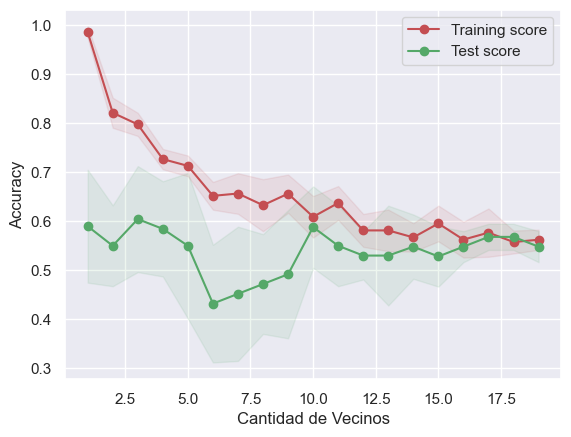

In [97]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

Vemos que el valor óptimo de K es de 3 sin que se presente un sobreajuste del modelo de entrenamiento. Vamos a instanciar un nuevo modelo pero con este valor de K y calculamos las métricas de evaluación que usamos para el modelo de árboles de decisión.

e. Instanciamos un nuevo K-Vecinos con K=3 (Es lo que se ve en la gráfica de optimización):

In [98]:
# Instanciamos un objeto de la clase KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=3)

In [99]:
# Entrenamos

clf1.fit(X.values,y.values)

KNeighborsClassifier(n_neighbors=3)

In [100]:
# Predecimos sobre nuestro set de entrenamieto

y_train_predK = clf1.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_predK = clf1.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


#### *2.8. Evaluación del modelo de K-Vecinos:*

a. Obtenemos la matrices de confusión:

In [101]:
matrixK = confusion_matrix(y_train, y_train_predK)
matrix_2K = confusion_matrix(y_test, y_test_predK)

In [102]:
cm_displayK = ConfusionMatrixDisplay(matrixK)
cm_display_2K = ConfusionMatrixDisplay(matrix_2K)

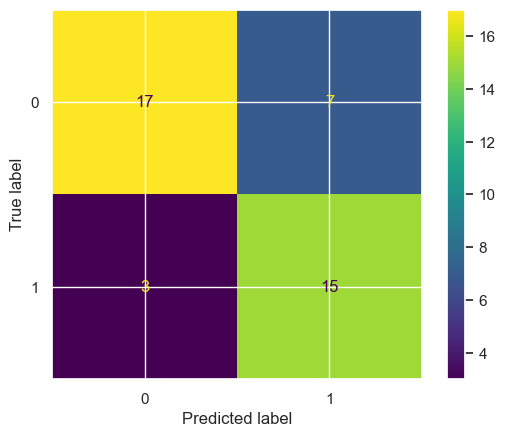

In [103]:
#Mostramos la matriz de confusión K para el conjunto de entrenamiento
cm_displayK.plot()
plt.show()

Se puede observar que para el conjunto de entrenamiento (42 registros) lo siguiente:
- Cantidad de verdaderos negativos: 17
- Cantidad de verdaderos positivos: 15
- Cantidad de falsos negativos: 3
- Cantidad de falsos positivos: 7

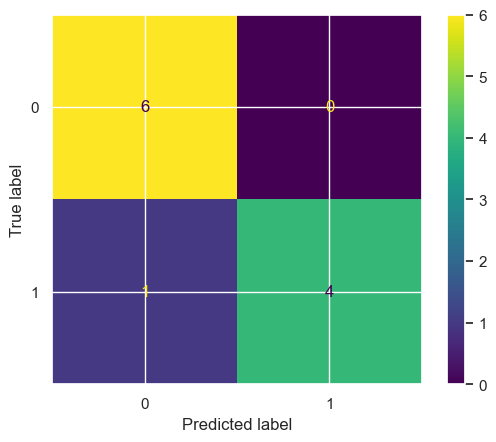

In [104]:
#Mostramos la matriz de confusión K para el conjunto de test
cm_display_2K.plot()
plt.show()

Se puede observar que para el conjunto de test (11 registros) lo siguiente:
- Cantidad de verdaderos negativos: 6
- Cantidad de verdaderos positivos: 4
- Cantidad de falsos negativos: 1
- Cantidad de falsos positivos: 0

b. **Exactitud:**

In [105]:
exactitud = accuracy_score(y_test, y_test_predK)
print(exactitud)

0.9090909090909091


La exactitud del modelo de test es de 90.9%, lo cual es una buena medida de ajuste e indica que el modelo tiene buena capacidad de predicción.

c. **Sensibilidad:**

In [106]:
sensibilidad = recall_score(y_test, y_test_predK, average= None)
print(sensibilidad)

[1.  0.8]


La sensibilidad es una medida que me indica cuantos verdaderos positivos (hospitalizados) tengo entre los verdaderos positivos y los falsos negativos (en realidad si van a estar hospitalizados pero el modelo arrojó que no). Esta métrica es del 80%. Lo cual es muy bueno porque queremos que haya la menor cantidad de falsos negativos y poder predecir adecuadamente los pacientes que van para hospitalización.

d. **Curva AUC-ROC:**

In [107]:
# Binarizamos y_test

y_test = label_binarize(y_test, classes=[0, 1])
y_test = np.hstack((y_test, 1 - y_test))
n_classes = y_test.shape[1]
print(y_test[:5])

[[1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]


In [108]:
y_scoreK = clf1.predict_proba(X_test)
print(y_scoreK[:5])

[[0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [109]:
# Computamos los valores de FPR (Tasa de falsos positivos) y TPR (tasa de verdaderos positivos), para luego realizar
# el gráfico de la curva ROC.

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scoreK[:, i])
    fpr[i] = 1-fpr[i]
    tpr[i] = 1-tpr[i]
    roc_auc[i] = auc(fpr[i], tpr[i])

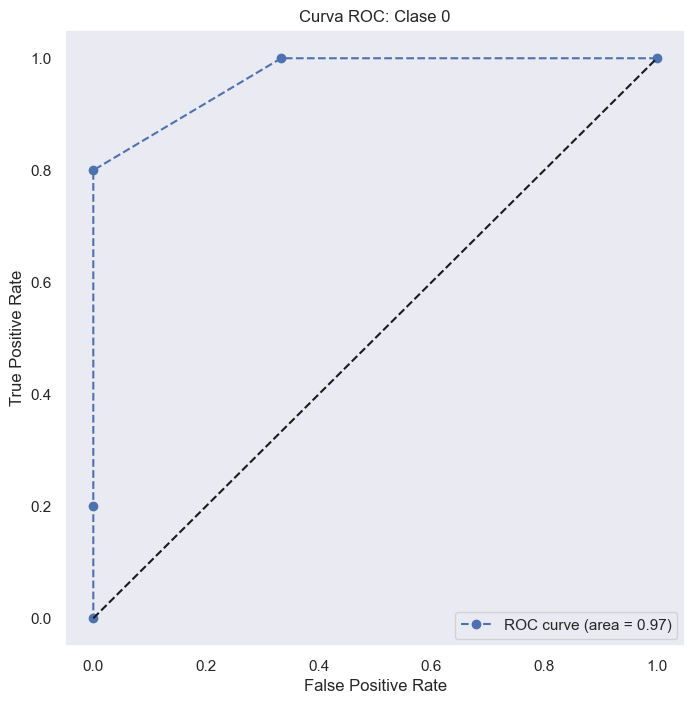

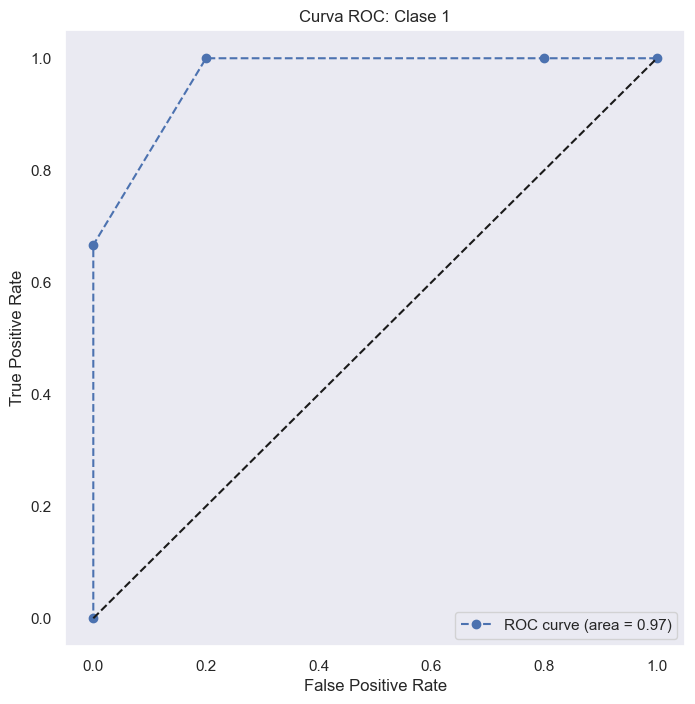

In [110]:
#Graficamos

# Recorremos con un bucle cada una de las clases

for i in range(n_classes):
    plt.figure(figsize=(8,8))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [111]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(y_test, y_predK, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_predK = lb.transform(y_predK)
    return roc_auc_score(y_test, y_predK, average=average)

In [112]:
print('El AUC-ROC multiclase:',multiclass_roc_auc_score(y_test, y_test_predK))

El AUC-ROC multiclase: 0.9


Vemos que la métrica AUC-ROC es de 0.90, lo cual indica que el modelo tiene un muy buen rendimiento a la hora de clasificar entre las clases 0 y 1 de la variable **HOSPITALIZACION**